In [ ]:
pip install anthropic

#**IMPORT LIBRARY**

In [1]:
from google.colab import drive

# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, linregress

# Machine Learning Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import glob
import os

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**LOAD DATASET**

###Dataset Anggota Tim

In [4]:
# Try tab-separated (common for some exports)
df_table_member = pd.read_csv('/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/anggota-fasilitator.csv', sep=';')
print("Loaded with tab separator:")
display(df_table_member.head())

Loaded with tab separator:


,No,Batch,Lokus,Anggota 1,Anggota 2,Anggota 3,Anggota 4,Anggota 5
0,1,1.10,SD.Kab.Ciamis.3,"Ir. Heni Sulastri, S.T., M.T","Neng Ika Kurniati, S.Si., M.Cs.",Muhamad Kaila Putra Julianto,Muhammad Alif Akhdan Tsani,Muhammad Azfa Huwaiza Al Aflah
1,2,1.20,SD.Kab.Ciamis.4,"Ratna Rustina, M.Pd","Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",Shofi Nurul Aini,Christine Angelica Soeharyanto,Farhan Esha Putra Kusuma Atmaja
2,3,1.30,SD.Kab.Ciamis.5,"Agus Supriatman, S.T., M.Kom.","Hilman Mutaqin, S.T., M.Kom.","Dimas Adisa Suryatama, S.Pd",Lauren Nugraha,Novarianda Saputra
3,4,1.40,SMA.SMK.Kab.Ciamis.1,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom","Agus Maulani, S.Sn","Reva Arya Maulana, RHCSA, CND., ECIH.","Rizki Pratama, CND., ECIH",Ali Astra Mikail
4,5,1.50,SMP.Kab.Ciamis.1,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE","Robby Maududy, S.Pd., M.Kom","Muhamad Aditya Darmawan, S.Kom.",Farhan Sabani,Muhamad Ali Murtadho


##Dataset Kelulusan

In [5]:

# Load and concatenate df_kelulusan
kelulusan_folder_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/laporan-akhir-lokus-kka-ysic'

all_files = os.listdir(kelulusan_folder_path)
csv_files = [f for f in all_files if f.endswith('.csv')]

list_df = []

for csv_file in csv_files:
    file_path = os.path.join(kelulusan_folder_path, csv_file)
    df = pd.read_csv(file_path)
    list_df.append(df)

df_kelulusan = pd.concat(list_df, ignore_index=True)
print("\ndf_kelulusan loaded and concatenated successfully:")
display(df_kelulusan.head())


df_kelulusan loaded and concatenated successfully:


,User ID,Email,Nama,Program Local Name,Kelas Name,PP Score,Presensi Score,Canvas Score,Total Score,Predikat,Status Nilai,Nilai Prasyarat Sertifikat,Status Prasyarat Sertifikat,Flag Sertifikat,Status Kelulusan
0,V0Bj21oo0Z,aannuraeni12@guru.sd.belajar.id,AAN NURAENI,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,87.16,87.16,Baik,Lulus,0,NaN,True,Lulus
1,qo68WAmb0a,abdulrosid68@guru.sd.belajar.id,ABDUL ROSID,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.94,85.94,Baik,Lulus,0,NaN,True,Lulus
2,J61gO4KE97,adinur77@guru.sd.belajar.id,ADI MUHAROM NUR,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,86.05,86.06,Baik,Lulus,0,NaN,True,Lulus
3,OyDOd1Kw9X,aditardinda44@guru.sd.belajar.id,ADI TARDINDA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.84,85.85,Baik,Lulus,0,NaN,True,Lulus
4,50ZOQBMN6m,agus988@guru.sd.belajar.id,AGUS JAJAT JATMIHA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,84.27,84.28,Baik,Lulus,0,NaN,True,Lulus


## Load Penilaian HR

In [20]:
# Load HR evaluation data
df_hr = pd.read_excel('/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Matriks Penilaian HR Dummy.xlsx')

# Standardize column names
df_hr = df_hr.rename(columns={
    'Nilai': 'Nilai_HR',
    'Keterangan/Alasan': 'Keterangan_HR'
})

In [21]:
# Keep only necessary columns
df_hr = df_hr[['ID', 'Nama', 'Kemampuan komunikasi',	'Pengalaman Kerja', 'Keterampilan Teknis',	'Penilaian Kinerja Kepegawaian']]

In [22]:
df_hr.head()

,ID,Nama,Kemampuan komunikasi,Pengalaman Kerja,Keterampilan Teknis,Penilaian Kinerja Kepegawaian
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",93,88,88,90
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",93,88,92,92
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",91,90,86,90
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",90,91,86,88
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",91,91,88,88


In [9]:
print("Missing values in df_hr:")
print(df_hr.isnull().sum())

Missing values in df_hr:
ID                               0
Nama                             0
Kemampuan komunikasi             0
Pengalaman Kerja                 0
Keterampilan Teknis              0
Penilaian Kinerja Kepegawaian    0
dtype: int64


In [10]:
# Menghapus baris dengan missing values dari df_hr
df_hr = df_hr.dropna()
print("df_hr setelah menghapus baris dengan missing values:")
print(df_hr.isnull().sum())
print(f"Shape df_hr setelah dropna: {df_hr.shape}")

df_hr setelah menghapus baris dengan missing values:
ID                               0
Nama                             0
Kemampuan komunikasi             0
Pengalaman Kerja                 0
Keterampilan Teknis              0
Penilaian Kinerja Kepegawaian    0
dtype: int64
Shape df_hr setelah dropna: (32, 6)


In [11]:
df_hr.shape

(32, 6)

## **Load Penilaian AI**

In [23]:
# Define folder containing AI evaluation files
AI_FOLDER = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Penilaian AI Anova'

# Get all Excel files in the folder
ai_files = glob.glob(os.path.join(AI_FOLDER, '*.xlsx'))

print(f"Found {len(ai_files)} AI evaluation files:")
for f in ai_files:
    print(f"  - {os.path.basename(f)}")

Found 5 AI evaluation files:
  - ChatGPT.5.2.xlsx
  - Claude Sonnet 4.5.xlsx
  - Deep Seek V3.2.xlsx
  - Gemini 3 Pro.xlsx
  - GLM 4.7.xlsx


In [ ]:
# Combine all AI data
df_ai_all = pd.concat(ai_dataframes, ignore_index=True)

print(f"\n{'='*60}")
print(f"Total AI evaluations: {len(df_ai_all)} rows")
print(f"Platforms: {df_ai_all['Platform'].unique().tolist()}")
print(f"\nSample of combined data:")
display(df_ai_all.head(10))


Total AI evaluations: 4995 rows
Platforms: ['ChatGPT.5.2', 'Claude Sonnet 4.5', 'Deep Seek V3.2', 'Gemini 3 pro', 'GLM 4.7']

Sample of combined data:


,ID,Nama,Nilai_AI,Platform,Waktu
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54
5,FKKA-06,"Evi Dewi Sri Mulyani, M.Kom",93.00,ChatGPT.5.2,00:01.85
6,FKKA-07,"Ratna Rustina, M.Pd",90.00,ChatGPT.5.2,00:01.67
7,FKKA-08,"Neng Ika Kurniati, S.Si., M.Cs.",94.00,ChatGPT.5.2,00:02.56
8,FKKA-09,"Shinta Siti Sundari, M.Kom",92.00,ChatGPT.5.2,00:01.89
9,FKKA-10,"Robby Maududy, S.Pd., M.Kom",94.00,ChatGPT.5.2,00:01.60


#**PEPROCESSING**

In [ ]:
#Melihat Value Pada Kolom Program Local Name

print("Unique values in 'Program Local Name' from df_kelulusan:")
print(df_kelulusan['Program Local Name'].unique())

Unique values in 'Program Local Name' from df_kelulusan:
['[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.3'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Tasikmalaya.5'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Tasikmalaya.3'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.1'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Tasikmalaya.6'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kota.Tasikmalaya.1'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Ciamis.1'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Tasikmalaya.2'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Garut.5'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Garut.4'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Ciamis.2'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.2'
 '[FASE D] KKA - LPD Yayasan Sakata I

In [ ]:
# Mengganti Value pada Program Local Name menjadi Hanya nama Lokus
df_kelulusan['Program Local Name'] = df_kelulusan['Program Local Name'].str.split(' - ').str[-1]
print("Updated unique values in 'Program Local Name' from df_kelulusan:")
print(df_kelulusan['Program Local Name'].unique())
display(df_kelulusan.head())

Updated unique values in 'Program Local Name' from df_kelulusan:
['SD.Kab.Ciamis.3' 'SD.Kab.Tasikmalaya.5' 'SMP.Kab.Tasikmalaya.3'
 'SD.Kab.Ciamis.1' 'SD.Kab.Tasikmalaya.6' 'SD.Kota.Tasikmalaya.1'
 'SMP.Kab.Ciamis.1' 'SMP.Kab.Tasikmalaya.2' 'SMP.Kab.Garut.5'
 'SMP.Kab.Garut.4' 'SMP.Kab.Ciamis.2' 'SD.Kab.Ciamis.2'
 'SMP.Kab.Tasikmalaya.1' 'SMP.Kota.Tasikmalaya.1' 'SD.Kota.Tasikmalaya.2'
 'SD.Kab.Tasikmalaya.4' 'SD.Kab.Ciamis.5' 'SMP.Kab.Garut.3'
 'SMA.SMK.Kab.Ciamis.1' 'SMA.SMK.Kota.Tasikmalaya.1'
 'SMA.Kab.Tasikmalaya.1' 'SD.Kab.Ciamis.4']


,User ID,Email,Nama,Program Local Name,Kelas Name,PP Score,Presensi Score,Canvas Score,Total Score,Predikat,Status Nilai,Nilai Prasyarat Sertifikat,Status Prasyarat Sertifikat,Flag Sertifikat,Status Kelulusan
0,V0Bj21oo0Z,aannuraeni12@guru.sd.belajar.id,AAN NURAENI,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,87.16,87.16,Baik,Lulus,0,NaN,True,Lulus
1,qo68WAmb0a,abdulrosid68@guru.sd.belajar.id,ABDUL ROSID,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.94,85.94,Baik,Lulus,0,NaN,True,Lulus
2,J61gO4KE97,adinur77@guru.sd.belajar.id,ADI MUHAROM NUR,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,86.05,86.06,Baik,Lulus,0,NaN,True,Lulus
3,OyDOd1Kw9X,aditardinda44@guru.sd.belajar.id,ADI TARDINDA,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.84,85.85,Baik,Lulus,0,NaN,True,Lulus
4,50ZOQBMN6m,agus988@guru.sd.belajar.id,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,84.27,84.28,Baik,Lulus,0,NaN,True,Lulus


#**DATA CLEANING**

In [ ]:
columns_to_drop = ['Email', 'Kelas Name', 'Nilai Prasyarat Sertifikat', 'Status Prasyarat Sertifikat', 'Flag Sertifikat', 'PP Score', 'Presensi Score', 'Status Nilai']
df_kelulusan = df_kelulusan.drop(columns=columns_to_drop, errors='ignore')
print(f"Columns {columns_to_drop} have been removed from df_kelulusan.")
display(df_kelulusan.head())

Columns ['Email', 'Kelas Name', 'Nilai Prasyarat Sertifikat', 'Status Prasyarat Sertifikat', 'Flag Sertifikat', 'PP Score', 'Presensi Score', 'Status Nilai'] have been removed from df_kelulusan.


,User ID,Nama,Program Local Name,Canvas Score,Total Score,Predikat,Status Kelulusan
0,V0Bj21oo0Z,AAN NURAENI,SD.Kab.Ciamis.3,87.16,87.16,Baik,Lulus
1,qo68WAmb0a,ABDUL ROSID,SD.Kab.Ciamis.3,85.94,85.94,Baik,Lulus
2,J61gO4KE97,ADI MUHAROM NUR,SD.Kab.Ciamis.3,86.05,86.06,Baik,Lulus
3,OyDOd1Kw9X,ADI TARDINDA,SD.Kab.Ciamis.3,85.84,85.85,Baik,Lulus
4,50ZOQBMN6m,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,84.27,84.28,Baik,Lulus


In [ ]:
print("Checking for null values in df_kelulusan:")
print(df_kelulusan.isnull().sum())

print("\nChecking for duplicate rows in df_kelulusan:")
print(df_kelulusan.duplicated().sum())

Checking for null values in df_kelulusan:
User ID               0
Nama                  0
Program Local Name    0
Canvas Score          0
Total Score           0
Predikat              0
Status Kelulusan      0
dtype: int64

Checking for duplicate rows in df_kelulusan:
0


### Data Cleaning AI Generate

In [ ]:
print("Unique values in 'Platform':")
print(df_ai_all['Platform'].unique())

Unique values in 'Platform':
['ChatGPT.5.2' 'Claude Sonnet 4.5' 'Deep Seek V3.2' 'Gemini 3 pro'
 'GLM 4.7']


In [ ]:
print("Missing values in df_ai_all:")
print(df_ai_all.isnull().sum())

Missing values in df_ai_all:
ID          4835
Nama        4835
Nilai_AI    4860
Platform       0
Waktu       4860
dtype: int64


In [ ]:
# Check initial state
print(f"\nOriginal rows: {len(df_ai_all)}")
print("\nMissing values sebelum cleaning:")
print(df_ai_all[['ID', 'Nama', 'Platform', 'Nilai_AI', 'Waktu']].isnull().sum())


Original rows: 4995

Missing values sebelum cleaning:
ID          4835
Nama        4835
Platform       0
Nilai_AI    4860
Waktu       4860
dtype: int64


In [ ]:
# Step 1: Remove rows with missing values in 'Nama'
df_ai_all_cleaned = df_ai_all.dropna(subset=['Nama']).copy()
print(f"\nSetelah drop missing 'Nama': {len(df_ai_all_cleaned)} rows")


Setelah drop missing 'Nama': 160 rows


In [ ]:
# Step 2: Check missing values per Platform
print("\n" + "-"*80)
print("Missing 'Nilai_AI' per Platform:")
print("-"*80)
missing_by_platform = df_ai_all_cleaned.groupby('Platform').agg({
    'Nilai_AI': lambda x: x.isnull().sum()
})
print(missing_by_platform)


--------------------------------------------------------------------------------
Missing 'Nilai_AI' per Platform:
--------------------------------------------------------------------------------
                   Nilai_AI
Platform                   
ChatGPT.5.2               5
Claude Sonnet 4.5         5
Deep Seek V3.2            5
GLM 4.7                   5
Gemini 3 pro              5


In [ ]:
# Step 3: Fill missing 'Nilai_AI' with MODE per Platform
def fill_with_mode(group):
    """
    Fill missing values dengan modus (nilai paling sering muncul)
    Fallback ke median jika tidak ada modus
    """
    # Hitung missing
    n_missing = group.isna().sum()

    if n_missing == 0:
        return group

    # Ambil nilai non-null
    non_null_values = group.dropna()

    if len(non_null_values) == 0:
        return group

    # Cari modus
    mode_values = non_null_values.mode()

    if len(mode_values) > 0:
        fill_value = mode_values.iloc[0]
        method = "modus"
    else:
        # Fallback ke median jika semua nilai unik
        fill_value = non_null_values.median()
        method = "median"

    print(f"  {group.name}: {n_missing} missing → filled with {fill_value:.2f} ({method})")

    return group.fillna(fill_value)

# Apply imputasi
df_ai_all_cleaned['Nilai_AI'] = df_ai_all_cleaned.groupby('Platform')['Nilai_AI'].transform(fill_with_mode)

# Verify Nilai_AI
nilai_ai_missing = df_ai_all_cleaned['Nilai_AI'].isnull().sum()
print(f"\nMissing 'Nilai_AI' setelah imputasi: {nilai_ai_missing}")

  ChatGPT.5.2: 5 missing → filled with 92.00 (modus)
  Claude Sonnet 4.5: 5 missing → filled with 93.00 (modus)
  Deep Seek V3.2: 5 missing → filled with 95.00 (modus)
  GLM 4.7: 5 missing → filled with 98.00 (modus)
  Gemini 3 pro: 5 missing → filled with 98.00 (modus)

Missing 'Nilai_AI' setelah imputasi: 0


In [ ]:
# Step 4: Handle missing 'Waktu' - fill with mode or drop
waktu_missing = df_ai_all_cleaned['Waktu'].isnull().sum()
print(f"\n" + "-"*80)
print(f"Missing 'Waktu': {waktu_missing}")

if waktu_missing > 0:
    # Try to fill with mode
    waktu_mode = df_ai_all_cleaned['Waktu'].mode()
    if len(waktu_mode) > 0:
        df_ai_all_cleaned['Waktu'].fillna(waktu_mode.iloc[0], inplace=True)
        print(f"  'Waktu' filled with mode: {waktu_mode.iloc[0]}")
    else:
        # If no mode, drop rows with missing Waktu
        before_drop = len(df_ai_all_cleaned)
        df_ai_all_cleaned = df_ai_all_cleaned.dropna(subset=['Waktu'])
        print(f"  Dropped {before_drop - len(df_ai_all_cleaned)} rows with missing 'Waktu'")


--------------------------------------------------------------------------------
Missing 'Waktu': 25
  'Waktu' filled with mode: 00:01.60


/tmp/ipython-input-4096660149.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ai_all_cleaned['Waktu'].fillna(waktu_mode.iloc[0], inplace=True)


In [ ]:
# Step 5: Final safety check - drop any critical missing values
critical_columns = ['ID', 'Nama', 'Platform', 'Nilai_AI']
before_final_drop = len(df_ai_all_cleaned)
df_ai_all_cleaned = df_ai_all_cleaned.dropna(subset=critical_columns)
dropped_critical = before_final_drop - len(df_ai_all_cleaned)

if dropped_critical > 0:
    print(f"\n⚠ Dropped {dropped_critical} rows with missing critical values (ID/Nama/Platform/Nilai_AI)")

In [ ]:
# Step 6: FINAL SUMMARY
print("\n" + "="*80)
print("SUMMARY - DATA CLEANING RESULTS")
print("="*80)
print(f"Original rows:      {len(df_ai_all)}")
print(f"Cleaned rows:       {len(df_ai_all_cleaned)}")
print(f"Rows dropped:       {len(df_ai_all) - len(df_ai_all_cleaned)}")
print(f"Retention rate:     {len(df_ai_all_cleaned)/len(df_ai_all)*100:.1f}%")

print("\n\nMissing values setelah cleaning:")
print(df_ai_all_cleaned[['ID', 'Nama', 'Platform', 'Nilai_AI', 'Waktu']].isnull().sum())


SUMMARY - DATA CLEANING RESULTS
Original rows:      4995
Cleaned rows:       160
Rows dropped:       4835
Retention rate:     3.2%


Missing values setelah cleaning:
ID          0
Nama        0
Platform    0
Nilai_AI    0
Waktu       0
dtype: int64


In [ ]:
# Step 7: Descriptive statistics per Platform
print("\n" + "-"*80)
print("Statistik Nilai_AI per Platform (setelah imputasi):")
print("-"*80)
stats = df_ai_all_cleaned.groupby('Platform')['Nilai_AI'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(stats.round(2))

print("\n✓ Data cleaning completed successfully!")


--------------------------------------------------------------------------------
Statistik Nilai_AI per Platform (setelah imputasi):
--------------------------------------------------------------------------------
                   count  mean  median  std   min   max
Platform                                               
ChatGPT.5.2           32 92.16   92.00 2.00 88.00 96.00
Claude Sonnet 4.5     32 92.56   93.00 3.27 85.00 98.00
Deep Seek V3.2        32 94.31   95.00 2.10 89.00 98.00
GLM 4.7               32 96.94   97.50 1.24 94.00 98.00
Gemini 3 pro          32 95.91   96.00 2.05 91.00 98.00

✓ Data cleaning completed successfully!


In [ ]:
df_ai_all_cleaned.shape

(160, 5)

In [ ]:
print("Missing values in df_ai_all_cleaned:")
print(df_ai_all_cleaned.isnull().sum())

Missing values in df_ai_all_cleaned:
ID          0
Nama        0
Nilai_AI    0
Platform    0
Waktu       0
dtype: int64


In [ ]:
print("Missing values in df_hr:")
print(df_hr.isnull().sum())

Missing values in df_hr:
ID          0
Nama        0
Nilai_HR    0
dtype: int64


#**EKSPLARATORY DATA ANALYSIS**

In [ ]:
participant_counts = df_kelulusan['Program Local Name'].value_counts()
print("Jumlah Peserta per Program Local Name:")
print(participant_counts)
print(f"\nTotal ada {len(participant_counts)} Program Local Name yang unik.")

Jumlah Peserta per Program Local Name:
Program Local Name
SD.Kab.Tasikmalaya.5          39
SMA.Kab.Tasikmalaya.1         37
SMA.SMK.Kab.Ciamis.1          36
SD.Kab.Ciamis.4               36
SMP.Kab.Tasikmalaya.1         33
SD.Kab.Ciamis.3               33
SD.Kab.Ciamis.2               32
SMP.Kab.Tasikmalaya.3         32
SD.Kab.Ciamis.1               32
SMP.Kab.Tasikmalaya.2         31
SD.Kab.Tasikmalaya.6          29
SMA.SMK.Kota.Tasikmalaya.1    28
SD.Kab.Tasikmalaya.4          27
SD.Kab.Ciamis.5               27
SMP.Kab.Garut.4               25
SMP.Kab.Garut.3               24
SMP.Kab.Garut.5               24
SMP.Kab.Ciamis.2              21
SD.Kota.Tasikmalaya.2         21
SD.Kota.Tasikmalaya.1         20
SMP.Kota.Tasikmalaya.1        16
SMP.Kab.Ciamis.1              16
Name: count, dtype: int64

Total ada 22 Program Local Name yang unik.


In [ ]:
total_participants_overall = len(df_kelulusan)
print(f"Jumlah total peserta secara keseluruhan: {total_participants_overall} orang.")

Jumlah total peserta secara keseluruhan: 619 orang.


/tmp/ipython-input-1937637626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participant_counts.index, y=participant_counts.values, palette='viridis')


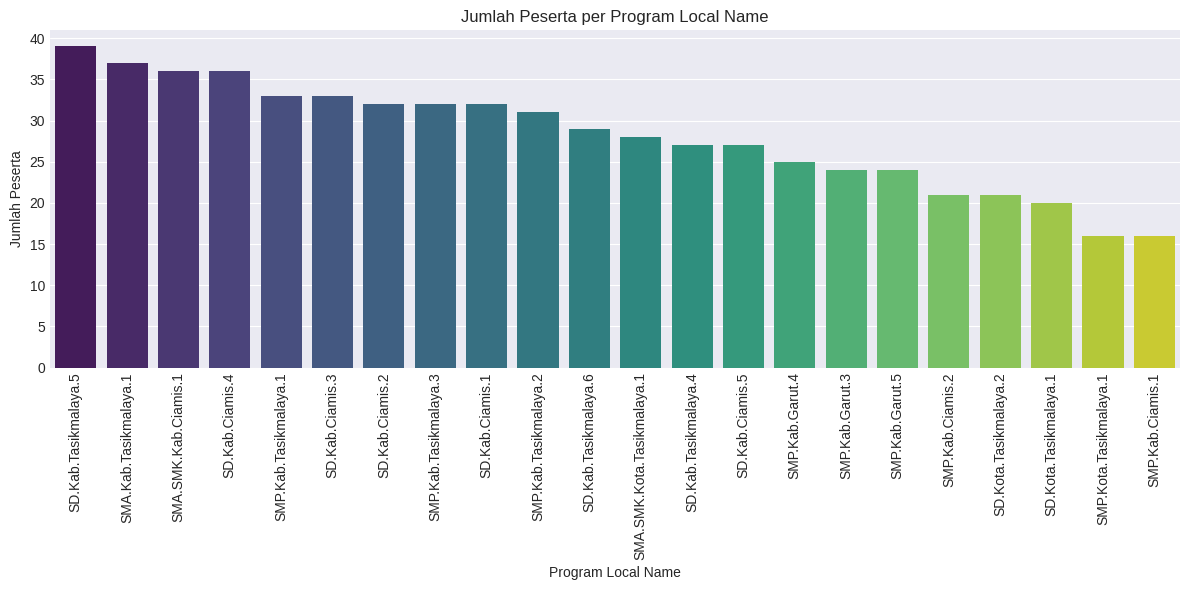

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=participant_counts.index, y=participant_counts.values, palette='viridis')
plt.xlabel('Program Local Name')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta per Program Local Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SMA:
Program Local Name
SMA.Kab.Tasikmalaya.1         37
SMA.SMK.Kab.Ciamis.1          36
SMA.SMK.Kota.Tasikmalaya.1    28
Name: count, dtype: int64


/tmp/ipython-input-946441275.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


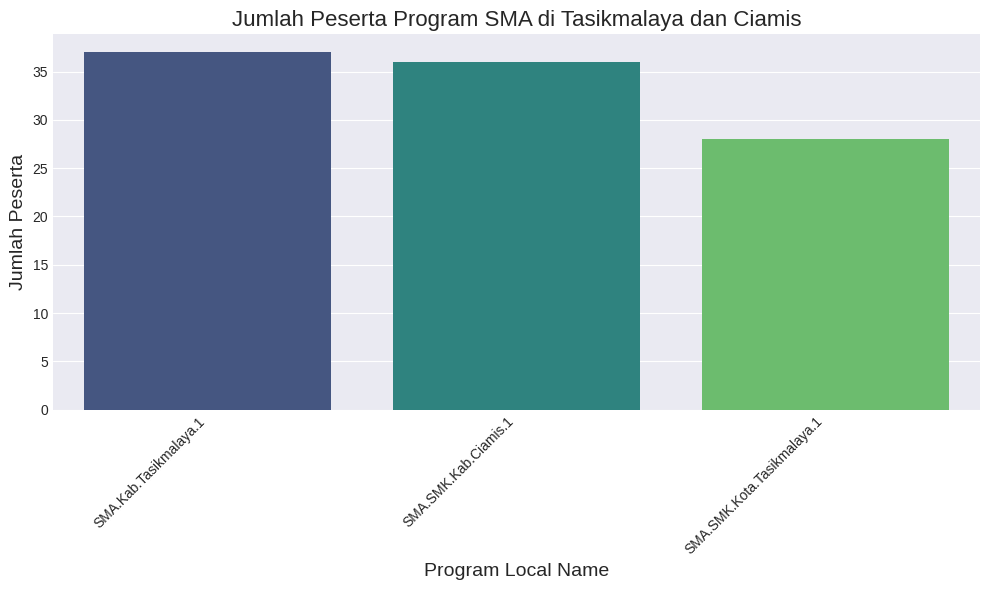

In [ ]:
# Melihat Persebaran Peserta di Fase SMA

# Define the keywords to filter
keywords = [
    'SMA.Kab.Tasikmalaya.1',
    'SMA.SMK.Kab.Ciamis.1',
    'SMA.SMK.Kota.Tasikmalaya.1'
]

# Filter the participant_counts Series based on the keywords
filtered_counts = participant_counts[participant_counts.index.isin(keywords)]

print("Jumlah Peserta untuk Program Local Name terkait SMA:")
print(filtered_counts)

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')
plt.xlabel('Program Local Name', fontsize=14)
plt.ylabel('Jumlah Peserta', fontsize=14)
plt.title('Jumlah Peserta Program SMA di Tasikmalaya dan Ciamis', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SMP (Digabung berdasarkan Wilayah):
Merged Program Name
SMP.Kab.Tasikmalaya     96
SMP.Kab.Garut           73
SMP.Kab.Ciamis          37
SMP.Kota.Tasikmalaya    16
Name: count, dtype: int64


/tmp/ipython-input-1931476330.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_smp_counts.index, y=merged_smp_counts.values, palette='viridis')


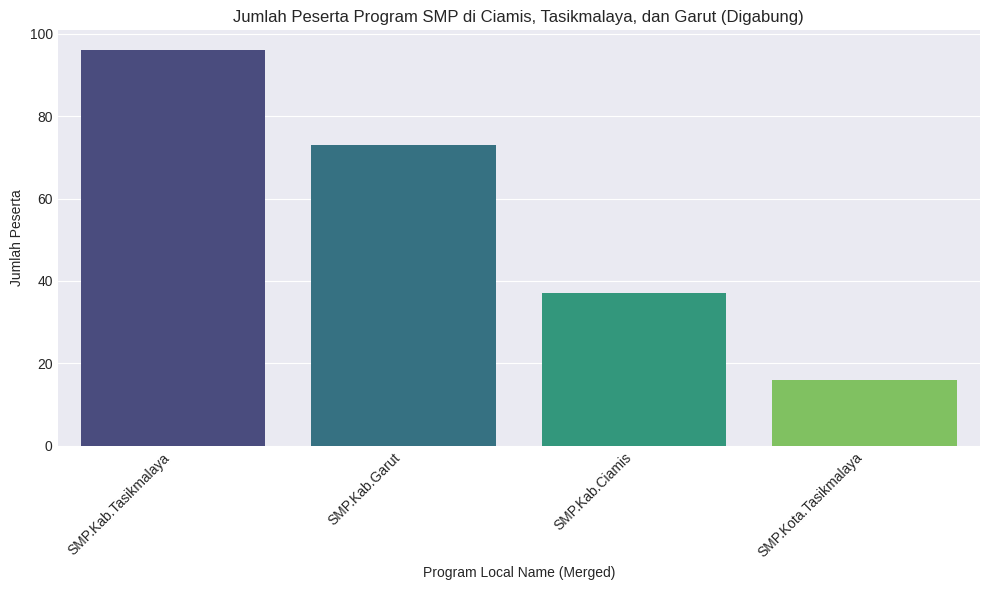

In [ ]:
# Melihat Persebaran Peserta di Fase SMP
smp_categories = {
    'SMP.Kab.Ciamis': ['SMP.Kab.Ciamis.1', 'SMP.Kab.Ciamis.2'],
    'SMP.Kab.Tasikmalaya': ['SMP.Kab.Tasikmalaya.1', 'SMP.Kab.Tasikmalaya.2', 'SMP.Kab.Tasikmalaya.3'],
    'SMP.Kota.Tasikmalaya': ['SMP.Kota.Tasikmalaya.1'],
    'SMP.Kab.Garut': ['SMP.Kab.Garut.3', 'SMP.Kab.Garut.4', 'SMP.Kab.Garut.5']
}

# Create a mapping from specific program names to merged categories
merged_category_map = {item: key for key, values in smp_categories.items() for item in values}

# Filter df_kelulusan for relevant SMP programs
filtered_df_smp = df_kelulusan[df_kelulusan['Program Local Name'].isin(list(merged_category_map.keys()))].copy()

# Create a new column with the merged program names
filtered_df_smp['Merged Program Name'] = filtered_df_smp['Program Local Name'].map(merged_category_map)

# Calculate participant counts for the merged categories
merged_smp_counts = filtered_df_smp['Merged Program Name'].value_counts()

print("Jumlah Peserta untuk Program Local Name terkait SMP (Digabung berdasarkan Wilayah):")
print(merged_smp_counts)

# Create the visualization for merged SMP programs
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_smp_counts.index, y=merged_smp_counts.values, palette='viridis')
plt.xlabel('Program Local Name (Merged)')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Program SMP di Ciamis, Tasikmalaya, dan Garut (Digabung)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SD (Digabung berdasarkan Wilayah):
Merged Program Name
SD.Kab.Ciamis          160
SD.Kab.Tasikmalaya      95
SD.Kota.Tasikmalaya     41
Name: count, dtype: int64


/tmp/ipython-input-4223586123.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_sd_counts.index, y=merged_sd_counts.values, palette='viridis')


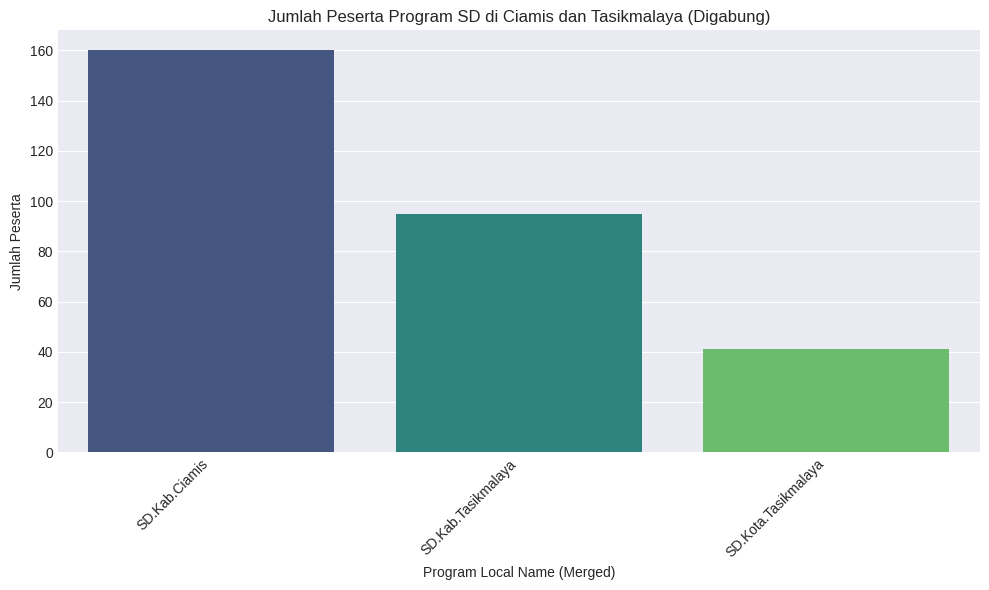

In [ ]:
# Melihat Persebaran Peserta di Fase SD
sd_categories = {
    'SD.Kab.Ciamis': ['SD.Kab.Ciamis.1', 'SD.Kab.Ciamis.2', 'SD.Kab.Ciamis.3', 'SD.Kab.Ciamis.4', 'SD.Kab.Ciamis.5'],
    'SD.Kab.Tasikmalaya': ['SD.Kab.Tasikmalaya.4', 'SD.Kab.Tasikmalaya.5', 'SD.Kab.Tasikmalaya.6'],
    'SD.Kota.Tasikmalaya': ['SD.Kota.Tasikmalaya.1', 'SD.Kota.Tasikmalaya.2']
    # Assuming no SD.Kab.Garut based on previous outputs, but including if it appears later
    # 'SD.Kab.Garut': []
}

# Create a mapping from specific program names to merged categories
merged_category_map_sd = {item: key for key, values in sd_categories.items() for item in values}

# Filter df_kelulusan for relevant SD programs
filtered_df_sd = df_kelulusan[df_kelulusan['Program Local Name'].isin(list(merged_category_map_sd.keys()))].copy()

# Create a new column with the merged program names
filtered_df_sd['Merged Program Name'] = filtered_df_sd['Program Local Name'].map(merged_category_map_sd)

# Calculate participant counts for the merged categories
merged_sd_counts = filtered_df_sd['Merged Program Name'].value_counts()

print("Jumlah Peserta untuk Program Local Name terkait SD (Digabung berdasarkan Wilayah):")
print(merged_sd_counts)

# Create the visualization for merged SD programs
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_sd_counts.index, y=merged_sd_counts.values, palette='viridis')
plt.xlabel('Program Local Name (Merged)')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Program SD di Ciamis dan Tasikmalaya (Digabung)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

**Melihat Data Perbandingan Kelulusan**

In [ ]:
# Mensegmentasikan Data Kelulusan Berdasarkan Jenjang

def get_fase_pendidikan(program_name):
    if 'SMA' in program_name:
        return 'SMA'
    elif 'SMP' in program_name:
        return 'SMP'
    elif 'SD' in program_name:
        return 'SD'
    return 'Other' # Default or unknown category

df_kelulusan['Fase Pendidikan'] = df_kelulusan['Program Local Name'].apply(get_fase_pendidikan)

print("df_kelulusan with new 'Fase Pendidikan' column:")
display(df_kelulusan.head())

df_kelulusan with new 'Fase Pendidikan' column:


,User ID,Nama,Program Local Name,Canvas Score,Total Score,Predikat,Status Kelulusan,Fase Pendidikan
0,V0Bj21oo0Z,AAN NURAENI,SD.Kab.Ciamis.3,87.16,87.16,Baik,Lulus,SD
1,qo68WAmb0a,ABDUL ROSID,SD.Kab.Ciamis.3,85.94,85.94,Baik,Lulus,SD
2,J61gO4KE97,ADI MUHAROM NUR,SD.Kab.Ciamis.3,86.05,86.06,Baik,Lulus,SD
3,OyDOd1Kw9X,ADI TARDINDA,SD.Kab.Ciamis.3,85.84,85.85,Baik,Lulus,SD
4,50ZOQBMN6m,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,84.27,84.28,Baik,Lulus,SD


In [ ]:
# Menghitung Angka Kelulusan

performance_by_phase = df_kelulusan.groupby(['Fase Pendidikan', 'Status Kelulusan']).size().unstack(fill_value=0)

print("Performance by Educational Phase and Status:\n")
display(performance_by_phase)


Performance by Educational Phase and Status:



Status Kelulusan,Lulus,Tidak Lulus
Fase Pendidikan,,
SD,293,3
SMA,93,8
SMP,203,19


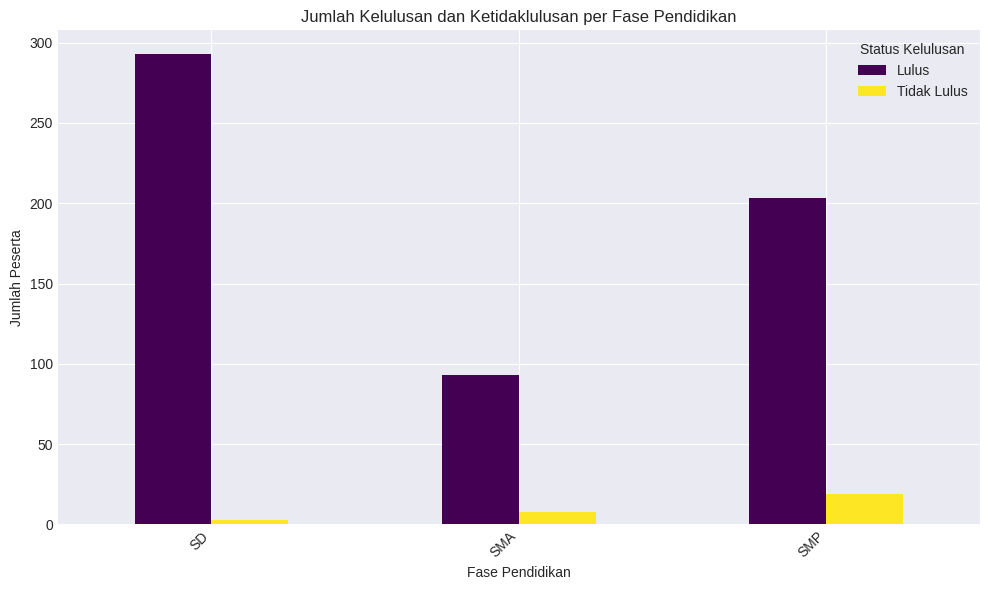

In [ ]:
#Melakukan Visualisasi Terhadap data yang Lulus dan Tidak Lulus

performance_by_phase.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Jumlah Kelulusan dan Ketidaklulusan per Fase Pendidikan')
plt.xlabel('Fase Pendidikan')
plt.ylabel('Jumlah Peserta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Kelulusan')
plt.tight_layout()
plt.show()


# **Task 1 (Data Aggregate)**
**(Membuat DataFrame Anggota Tim dengan Lokus dan Kelulusan Peserta)**

In [ ]:
total_participants_per_lokus = df_kelulusan['Program Local Name'].value_counts().rename('Total Participants')

passing_participants = df_kelulusan[df_kelulusan['Status Kelulusan'] == 'Lulus']
passing_participants_per_lokus = passing_participants['Program Local Name'].value_counts().rename('Passing Participants')

lokus_performance = pd.DataFrame({
    'Total Participants': total_participants_per_lokus,
    'Passing Participants': passing_participants_per_lokus
}).fillna(0).astype(int)

print("Lokus Performance Summary:")
display(lokus_performance.head())
print(f"\nTotal entries in lokus_performance: {len(lokus_performance)}")

Lokus Performance Summary:


,Total Participants,Passing Participants
Program Local Name,,
SD.Kab.Ciamis.1,32,32
SD.Kab.Ciamis.2,32,32
SD.Kab.Ciamis.3,33,32
SD.Kab.Ciamis.4,36,36
SD.Kab.Ciamis.5,27,27



Total entries in lokus_performance: 22


In [ ]:
# menggabungkan data anggota tim dengan jumlah peserta

df_merged_performance = pd.merge(df_table_member,
                                 lokus_performance,
                                 left_on='Lokus',
                                 right_index=True,
                                 how='left')

print("Merged DataFrame (df_merged_performance) head:")
display(df_merged_performance.head())

Merged DataFrame (df_merged_performance) head:


,No,Batch,Lokus,Anggota 1,Anggota 2,Anggota 3,Anggota 4,Anggota 5,Total Participants,Passing Participants
0,1,1.10,SD.Kab.Ciamis.3,"Ir. Heni Sulastri, S.T., M.T","Neng Ika Kurniati, S.Si., M.Cs.",Muhamad Kaila Putra Julianto,Muhammad Alif Akhdan Tsani,Muhammad Azfa Huwaiza Al Aflah,33,32
1,2,1.20,SD.Kab.Ciamis.4,"Ratna Rustina, M.Pd","Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",Shofi Nurul Aini,Christine Angelica Soeharyanto,Farhan Esha Putra Kusuma Atmaja,36,36
2,3,1.30,SD.Kab.Ciamis.5,"Agus Supriatman, S.T., M.Kom.","Hilman Mutaqin, S.T., M.Kom.","Dimas Adisa Suryatama, S.Pd",Lauren Nugraha,Novarianda Saputra,27,27
3,4,1.40,SMA.SMK.Kab.Ciamis.1,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom","Agus Maulani, S.Sn","Reva Arya Maulana, RHCSA, CND., ECIH.","Rizki Pratama, CND., ECIH",Ali Astra Mikail,36,34
4,5,1.50,SMP.Kab.Ciamis.1,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE","Robby Maududy, S.Pd., M.Kom","Muhamad Aditya Darmawan, S.Kom.",Farhan Sabani,Muhamad Ali Murtadho,16,16


In [ ]:
# Melakukan agregasi terhadap data member dan kelulusann

df_melted = df_merged_performance.melt(id_vars=['No', 'Batch', 'Lokus', 'Total Participants', 'Passing Participants'],
                                   value_vars=[col for col in df_merged_performance.columns if 'Anggota' in col],
                                   var_name='Anggota Type',
                                   value_name='Nama Fasilitator')

# Drop rows where 'Nama Fasilitator' might be empty or NaN if a lokus had fewer than 5 anggota
df_melted = df_melted.dropna(subset=['Nama Fasilitator'])

# Aggregate by 'Nama Fasilitator'
df_member = df_melted.groupby('Nama Fasilitator').agg(
    Jumlah_Lokus_Pegangan=('Lokus', 'nunique'),
    Total_Peserta_Responsibility=('Total Participants', 'sum'),
    Lulus_Peserta_Responsibility=('Passing Participants', 'sum')
).reset_index()

print("Aggregated df_member head:")
display(df_member.head())

Aggregated df_member head:


,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility
0,"Adhi Arsandi, S.I.Kom., M.T.",1,28,25
1,"Agus Maulani, S.Sn",1,36,34
2,"Agus Supriatman, S.T., M.Kom.",4,102,99
3,Ali Astra Mikail,3,101,93
4,Anzar Rahman Permana,3,80,78


In [ ]:
# Melihat Anggota Tim dengan Jumlah Lokus dan Peserta Pegangan

df_member['Persentase Kelulusan Peserta'] = (df_member['Lulus_Peserta_Responsibility'] / df_member['Total_Peserta_Responsibility'] * 100).round(2)
df_member['Persentase Kelulusan Peserta'] = df_member['Persentase Kelulusan Peserta'].replace([np.inf, -np.inf], 0)
df_member['Peserta Yang Lulus'] = df_member['Lulus_Peserta_Responsibility'].astype(str) + '/' + df_member['Total_Peserta_Responsibility'].astype(str)

print("Final df_member head with 'Peserta Yang Lulus' and 'Persentase Kelulusan Peserta':")
display(df_member)

Final df_member head with 'Peserta Yang Lulus' and 'Persentase Kelulusan Peserta':


,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility,Persentase Kelulusan Peserta,Peserta Yang Lulus
0,"Adhi Arsandi, S.I.Kom., M.T.",1,28,25,89.29,25/28
1,"Agus Maulani, S.Sn",1,36,34,94.44,34/36
2,"Agus Supriatman, S.T., M.Kom.",4,102,99,97.06,99/102
3,Ali Astra Mikail,3,101,93,92.08,93/101
4,Anzar Rahman Permana,3,80,78,97.50,78/80
5,Christine Angelica Soeharyanto,3,96,95,98.96,95/96
6,"Dimas Adisa Suryatama, S.Pd",4,112,108,96.43,108/112
7,Dina Lestari,3,70,62,88.57,62/70
8,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",4,100,95,95.00,95/100
9,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",4,125,114,91.20,114/125


In [ ]:
df_member = df_member[df_member['Nama Fasilitator'] != 'Null']
df_member = df_member.dropna()
df_member = df_member.sort_values(by='Jumlah_Lokus_Pegangan', ascending=False).reset_index(drop=True)
display(df_member)

,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility,Persentase Kelulusan Peserta,Peserta Yang Lulus
0,"Agus Supriatman, S.T., M.Kom.",4,102,99,97.06,99/102
1,"Dimas Adisa Suryatama, S.Pd",4,112,108,96.43,108/112
2,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",4,116,109,93.97,109/116
3,"Ir. Heni Sulastri, S.T., M.T",4,118,113,95.76,113/118
4,"Hilman Mutaqin, S.T., M.Kom.",4,103,99,96.12,99/103
5,Farhan Esha Putra Kusuma Atmaja,4,117,110,94.02,110/117
6,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",4,125,114,91.20,114/125
7,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",4,100,95,95.00,95/100
8,"Rizki Pratama, CND., ECIH",4,125,114,91.20,114/125
9,"Reva Arya Maulana, RHCSA, CND., ECIH.",4,126,114,90.48,114/126


In [ ]:
#Simpan df_member
output_dir = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output'
output_path = os.path.join(output_dir, 'df_member_export.csv')

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

df_member.to_csv(output_path, index=False)
print(f"df_member successfully exported to {output_path}")

df_member successfully exported to /content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output/df_member_export.csv


# ANOVA TEST

Anova Test Value

In [ ]:
unique_platforms = df_ai_all_cleaned['Platform'].unique().tolist()
print("Unique AI Platforms:")
print(unique_platforms)

Unique AI Platforms:
['ChatGPT.5.2', 'Claude Sonnet 4.5', 'Deep Seek V3.2', 'Gemini 3 pro', 'GLM 4.7']


In [ ]:
df_merged_scores = pd.merge(df_ai_all_cleaned, df_hr, on=['ID', 'Nama'], how='inner')

print("df_merged_scores head:")
display(df_merged_scores.head())
print(f"\nShape of df_merged_scores: {df_merged_scores.shape}")

df_merged_scores head:


,ID,Nama,Nilai_AI,Platform,Waktu,Nilai_HR
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13,90.00
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03,92.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19,90.00
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20,88.00
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54,88.00



Shape of df_merged_scores: (160, 6)


In [ ]:
import scipy.stats as stats

anova_results = {}

for platform in unique_platforms:
    print(f"\n{'='*50}")
    print(f"ANOVA for Platform: {platform}")
    print(f"{'='*50}")

    # Filter data for the current platform
    df_platform = df_merged_scores[df_merged_scores['Platform'] == platform].copy()

    if df_platform.empty:
        print(f"No data available for {platform}. Skipping ANOVA.")
        continue

    # Prepare data for ANOVA: Create groups based on unique 'Nilai_HR' for this platform
    nilai_hr_groups_platform = {}
    for score in df_platform['Nilai_HR'].unique():
        nilai_hr_groups_platform[score] = df_platform[df_platform['Nilai_HR'] == score]['Nilai_AI']

    list_of_nilai_ai_groups_platform = [group.dropna() for group in nilai_hr_groups_platform.values()]

    # Check if there are at least two groups to compare and each group has at least one observation
    if len(list_of_nilai_ai_groups_platform) < 2 or any(len(g) == 0 for g in list_of_nilai_ai_groups_platform):
        print(f"Insufficient data to perform ANOVA for {platform}. Need at least two groups with data.")
        anova_results[platform] = {
            'F-statistic': None,
            'P-value': None,
            'Eta-squared': None,
            'Conclusion': 'Insufficient data'
        }
        continue

    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*list_of_nilai_ai_groups_platform)

    # Calculate Eta-squared (η²)
    mean_total_platform = df_platform['Nilai_AI'].mean()
    ss_between_platform = sum([len(group) * (group.mean() - mean_total_platform)**2 for group in list_of_nilai_ai_groups_platform])
    ss_total_platform = sum([(x - mean_total_platform)**2 for group in list_of_nilai_ai_groups_platform for x in group])

    eta_squared_platform = ss_between_platform / ss_total_platform if ss_total_platform > 0 else 0

    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Eta-squared (η²): {eta_squared_platform:.3f}")

    conclusion = ""
    if p_value < 0.05:
        conclusion = "There is a statistically significant difference in Nilai_AI means across different Nilai_HR groups."
    else:
        conclusion = "There is no statistically significant difference in Nilai_AI means across different Nilai_HR groups."
    print(f"Conclusion: {conclusion}")

    anova_results[platform] = {
        'F-statistic': f_statistic,
        'P-value': p_value,
        'Eta-squared': eta_squared_platform,
        'Conclusion': conclusion
    }


ANOVA for Platform: ChatGPT.5.2
F-statistic: 0.32
P-value: 0.808
Eta-squared (η²): 0.034
Conclusion: There is no statistically significant difference in Nilai_AI means across different Nilai_HR groups.

ANOVA for Platform: Claude Sonnet 4.5
F-statistic: 2.27
P-value: 0.102
Eta-squared (η²): 0.196
Conclusion: There is no statistically significant difference in Nilai_AI means across different Nilai_HR groups.

ANOVA for Platform: Deep Seek V3.2
F-statistic: 0.69
P-value: 0.566
Eta-squared (η²): 0.069
Conclusion: There is no statistically significant difference in Nilai_AI means across different Nilai_HR groups.

ANOVA for Platform: Gemini 3 pro
F-statistic: 0.02
P-value: 0.996
Eta-squared (η²): 0.002
Conclusion: There is no statistically significant difference in Nilai_AI means across different Nilai_HR groups.

ANOVA for Platform: GLM 4.7
F-statistic: 0.15
P-value: 0.932
Eta-squared (η²): 0.015
Conclusion: There is no statistically significant difference in Nilai_AI means across differ

## Visualize ANOVA Results

### Subtask:
Create visualizations to summarize the ANOVA results for each AI platform, focusing on p-values and Eta-squared.


**Reasoning**:
The next step is to convert the `anova_results` dictionary into a pandas DataFrame to facilitate plotting and analysis.



In [ ]:
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
print("ANOVA Results DataFrame:")
display(anova_df)

**Reasoning**:
I need to create two bar plots to visualize the p-values and Eta-squared values from the `anova_df` for each AI platform. This involves using `matplotlib.pyplot` and `seaborn` to generate the plots, set appropriate labels and titles, and add a significance threshold line to the p-value plot.



In [ ]:
plt.figure(figsize=(14, 6))

# Plotting P-values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x=anova_df.index, y='P-value', data=anova_df, palette='viridis')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.title('ANOVA P-values per AI Platform', fontsize=14)
plt.xlabel('AI Platform', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.05) # Ensure p-value range is visible

# Plotting Eta-squared
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x=anova_df.index, y='Eta-squared', data=anova_df, palette='magma')
plt.title('ANOVA Eta-squared (η²) per AI Platform', fontsize=14)
plt.xlabel('AI Platform', fontsize=12)
plt.ylabel('Eta-squared (η²)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, anova_df['Eta-squared'].max() * 1.1) # Adjust y-limit dynamically

plt.tight_layout()
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without explicitly assigning a `hue` argument in `sns.barplot`. To resolve this, I need to modify the `sns.barplot` calls to assign the `x` variable to `hue` and set `legend=False` for both plots.



In [ ]:
plt.figure(figsize=(14, 6))

# Plotting P-values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x=anova_df.index, y='P-value', hue=anova_df.index, data=anova_df, palette='viridis', legend=False)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.title('ANOVA P-values per AI Platform', fontsize=14)
plt.xlabel('AI Platform', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.05) # Ensure p-value range is visible

# Plotting Eta-squared
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x=anova_df.index, y='Eta-squared', hue=anova_df.index, data=anova_df, palette='magma', legend=False)
plt.title('ANOVA Eta-squared (η²) per AI Platform', fontsize=14)
plt.xlabel('AI Platform', fontsize=12)
plt.ylabel('Eta-squared (η²)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, anova_df['Eta-squared'].max() * 1.1) # Adjust y-limit dynamically

plt.tight_layout()
plt.show()

## Summary

### Q&A
For each unique AI platform, are there significant differences in 'Nilai\_AI' means across different 'Nilai\_HR' groups?
No, for all AI platforms analyzed (ChatGPT.5.2, Claude Sonnet 4.5, Deep Seek V3.2, Gemini 3 pro, and GLM 4.7), there is no statistically significant difference in 'Nilai\_AI' means across different 'Nilai\_HR' groups, as indicated by p-values greater than the 0.05 significance level.

### Data Analysis Key Findings
*   The analysis covered five unique AI platforms: ChatGPT.5.2, Claude Sonnet 4.5, Deep Seek V3.2, Gemini 3 pro, and GLM 4.7.
*   For **ChatGPT.5.2**, the ANOVA test yielded an F-statistic of 0.32, a p-value of 0.808, and an Eta-squared ($\eta^{2}$) of 0.034.
*   For **Claude Sonnet 4.5**, the ANOVA test resulted in an F-statistic of 2.27, a p-value of 0.102, and an Eta-squared ($\eta^{2}$) of 0.196.
*   For **Deep Seek V3.2**, the ANOVA test showed an F-statistic of 0.69, a p-value of 0.566, and an Eta-squared ($\eta^{2}$) of 0.069.
*   For **Gemini 3 pro**, the ANOVA test produced an F-statistic of 0.02, a p-value of 0.996, and an Eta-squared ($\eta^{2}$) of 0.002.
*   For **GLM 4.7**, the ANOVA test gave an F-statistic of 0.15, a p-value of 0.932, and an Eta-squared ($\eta^{2}$) of 0.015.
*   Across all platforms, the p-values were consistently higher than 0.05, leading to the conclusion that there is no statistically significant difference in the 'Nilai\_AI' means among various 'Nilai\_HR' groups for any of the tested AI platforms.
*   Bar plots were generated to visualize the p-values against a significance threshold of 0.05 and the Eta-squared ($\eta^{2}$) values for each platform, providing a clear summary of these results.

### Insights or Next Steps
*   Since 'Nilai\_HR' groups do not significantly explain the variance in 'Nilai\_AI' scores for any platform, further investigation into other factors or interaction effects might be necessary to understand what influences 'Nilai\_AI'.
*   Explore alternative statistical models or non-parametric tests if the assumptions for ANOVA (e.g., normality, homogeneity of variances) are not fully met, although the current analysis found no significant differences.


# Analisis Kualitatif

Identifikasi outliers atau kasus-kasus ekstrem di mana AI sangat berbeda dari HR

# Post-Hoc

Bandingkan mean Nilai_AI untuk setiap kategori Nilai_HR (misalnya: rendah, sedang, tinggi)

In [ ]:
df_merged_scores = pd.merge(df_ai_all_cleaned, df_hr, on=['ID', 'Nama'], how='inner')

print("df_merged_scores head:")
display(df_merged_scores.head())
print(f"\nShape of df_merged_scores: {df_merged_scores.shape}")

df_merged_scores head:


,ID,Nama,Nilai_AI,Platform,Waktu,Nilai_HR
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13,90.00
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03,92.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19,90.00
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20,88.00
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54,88.00



Shape of df_merged_scores: (160, 6)


**Reasoning**:
I need to inspect the distribution of 'Nilai_HR' in `df_merged_scores` to determine suitable thresholds for 'Low', 'Medium', and 'High' categories. I will use `value_counts()` and descriptive statistics to understand the data spread.



In [ ]:
print("Distribution of Nilai_HR:")
display(df_merged_scores['Nilai_HR'].value_counts().sort_index())
print("\nDescriptive statistics for Nilai_HR:")
display(df_merged_scores['Nilai_HR'].describe())

Distribution of Nilai_HR:


,count
Nilai_HR,
86.00,15
88.00,60
90.00,40
92.00,45



Descriptive statistics for Nilai_HR:


,Nilai_HR
count,160.00
mean,89.44
std,1.96
min,86.00
25%,88.00
50%,90.00
75%,92.00
max,92.00


**Reasoning**:
Based on the distribution of 'Nilai_HR' (min 86, 25% 88, 50% 90, 75% 92, max 92), I will define thresholds to categorize it into 'Low' (values less than 88), 'Medium' (values from 88 up to, but not including, 92), and 'High' (values 92 and above). I will use `pd.cut` to create the new 'Nilai_HR_Category' column and then display its value counts.



In [ ]:
bins = [df_merged_scores['Nilai_HR'].min() - 1, 87.9, 91.9, df_merged_scores['Nilai_HR'].max() + 1]
labels = ['Low', 'Medium', 'High']

df_merged_scores['Nilai_HR_Category'] = pd.cut(
    df_merged_scores['Nilai_HR'],
    bins=bins,
    labels=labels,
    right=True, # Intervals are (min, max] by default. For our case, we want (min, max] like logic
    include_lowest=True # Include the lowest value (min-1) in the first bin
)

print("Value counts for Nilai_HR_Category:")
display(df_merged_scores['Nilai_HR_Category'].value_counts())
print("\nFirst 5 rows with new Nilai_HR_Category:")
display(df_merged_scores.head())

Value counts for Nilai_HR_Category:


,count
Nilai_HR_Category,
Medium,100
High,45
Low,15



First 5 rows with new Nilai_HR_Category:


,ID,Nama,Nilai_AI,Platform,Waktu,Nilai_HR,Nilai_HR_Category
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13,90.00,Medium
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03,92.00,High
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19,90.00,Medium
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20,88.00,Medium
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54,88.00,Medium


**Reasoning**:
Now that the 'Nilai_HR_Category' column has been created, I will calculate the mean 'Nilai_AI' for each category ('Low', 'Medium', 'High') within each AI platform to compare their performance, as requested by the post-hoc analysis.



In [ ]:
print("Mean Nilai_AI per Nilai_HR_Category and Platform:")
mean_nilai_ai_by_category = df_merged_scores.groupby(['Platform', 'Nilai_HR_Category'])['Nilai_AI'].mean().unstack()
display(mean_nilai_ai_by_category)


Mean Nilai_AI per Nilai_HR_Category and Platform:


/tmp/ipython-input-1628143381.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_nilai_ai_by_category = df_merged_scores.groupby(['Platform', 'Nilai_HR_Category'])['Nilai_AI'].mean().unstack()


Nilai_HR_Category,Low,Medium,High
Platform,,,
ChatGPT.5.2,92.00,92.20,92.11
Claude Sonnet 4.5,94.00,93.05,91.00
Deep Seek V3.2,94.67,94.40,94.00
GLM 4.7,97.33,96.95,96.78
Gemini 3 pro,96.00,95.85,96.00


**Reasoning**:
The previous code generated a `FutureWarning` because the `groupby` operation on a categorical column did not explicitly set the `observed` parameter. To suppress this warning and ensure consistent behavior, I will add `observed=False` to the `groupby` call.



In [ ]:
print("Mean Nilai_AI per Nilai_HR_Category and Platform:")
mean_nilai_ai_by_category = df_merged_scores.groupby(['Platform', 'Nilai_HR_Category'], observed=False)['Nilai_AI'].mean().unstack()
display(mean_nilai_ai_by_category)


Mean Nilai_AI per Nilai_HR_Category and Platform:


Nilai_HR_Category,Low,Medium,High
Platform,,,
ChatGPT.5.2,92.00,92.20,92.11
Claude Sonnet 4.5,94.00,93.05,91.00
Deep Seek V3.2,94.67,94.40,94.00
GLM 4.7,97.33,96.95,96.78
Gemini 3 pro,96.00,95.85,96.00


## Loop Through Each AI Platform for Post-Hoc

### Subtask:
Iterate through each unique AI platform to perform post-hoc analysis individually.


**Reasoning**:
The first instruction is to get a list of unique AI platforms from the 'Platform' column in `df_merged_scores` and store it in a variable named `unique_platforms`.



In [ ]:
unique_platforms = df_merged_scores['Platform'].unique().tolist()
print("Unique AI Platforms for Post-Hoc Analysis:")
print(unique_platforms)

Unique AI Platforms for Post-Hoc Analysis:
['ChatGPT.5.2', 'Claude Sonnet 4.5', 'Deep Seek V3.2', 'Gemini 3 pro', 'GLM 4.7']


**Reasoning**:
To compare the mean 'Nilai_AI' for each 'Nilai_HR_Category' for each AI platform, I will iterate through the `unique_platforms` and create a bar plot for each platform, visualizing the mean 'Nilai_AI' across the 'Low', 'Medium', and 'High' HR categories. This will provide a clear visual comparison as requested by the subtask.



/tmp/ipython-input-4066811543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')


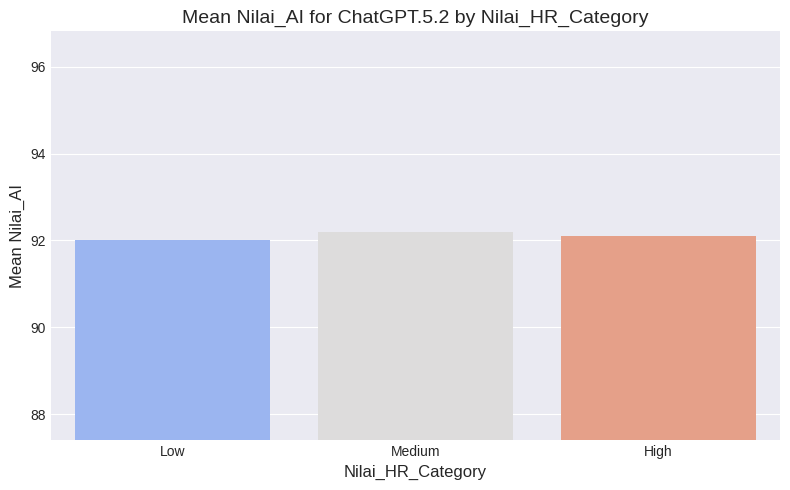

/tmp/ipython-input-4066811543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')


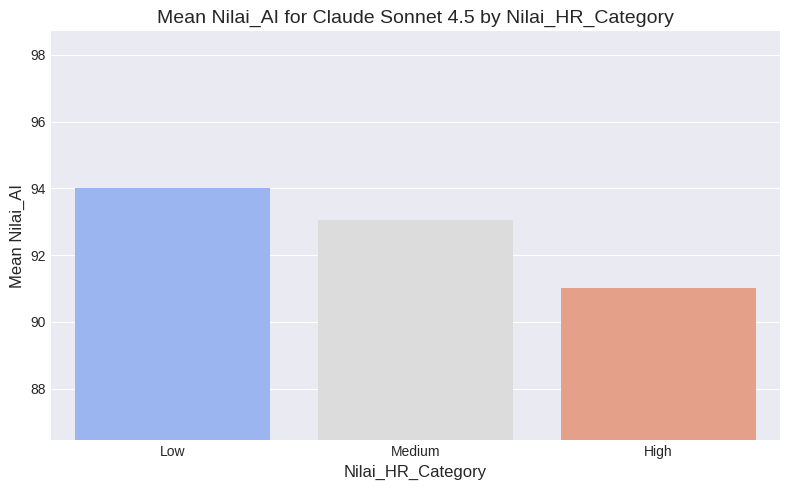

/tmp/ipython-input-4066811543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')


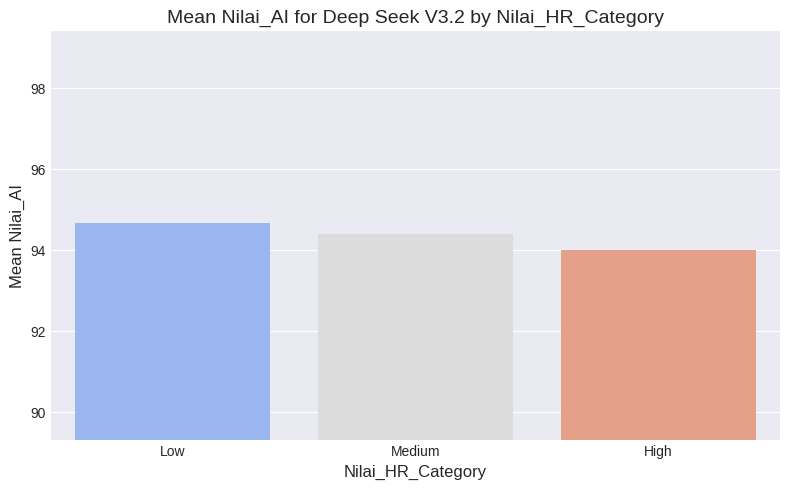

/tmp/ipython-input-4066811543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')


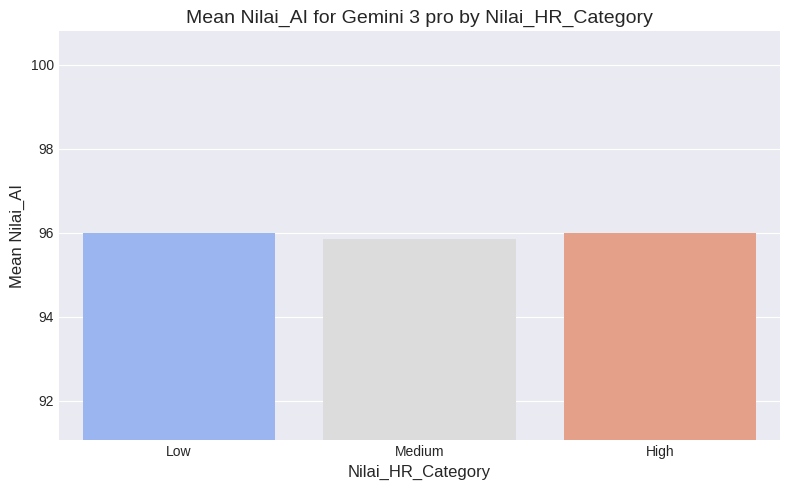

/tmp/ipython-input-4066811543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')


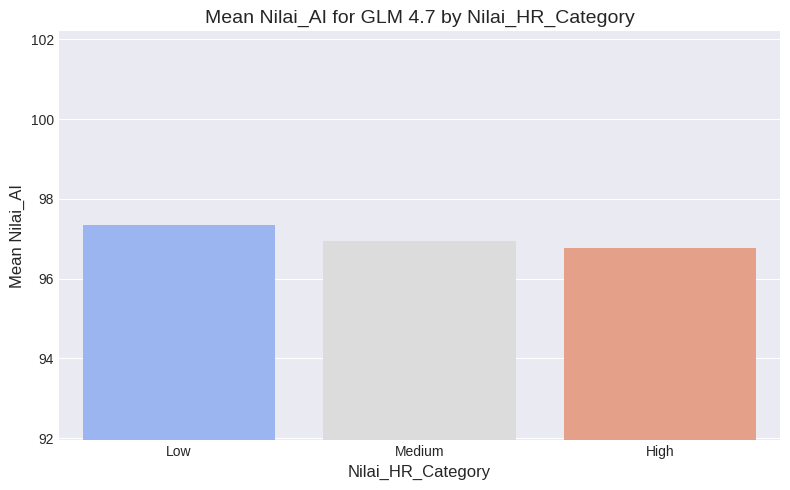

In [ ]:
for platform in unique_platforms:
    plt.figure(figsize=(8, 5))
    df_platform_category_mean = mean_nilai_ai_by_category.loc[platform]

    # Ensure consistent order of categories for plotting
    ordered_categories = ['Low', 'Medium', 'High']
    df_platform_category_mean = df_platform_category_mean.reindex(ordered_categories)

    sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, palette='coolwarm')
    plt.title(f'Mean Nilai_AI for {platform} by Nilai_HR_Category', fontsize=14)
    plt.xlabel('Nilai_HR_Category', fontsize=12)
    plt.ylabel('Mean Nilai_AI', fontsize=12)
    plt.ylim(min(df_platform_category_mean.values) * 0.95, max(df_platform_category_mean.values) * 1.05) # Dynamic y-limit
    plt.tight_layout()
    plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because the `palette` argument was used in `sns.barplot` without explicitly assigning a `hue` argument. To fix this, I need to modify the `sns.barplot` call to set `hue=df_platform_category_mean.index` and `legend=False` as suggested by the warning.



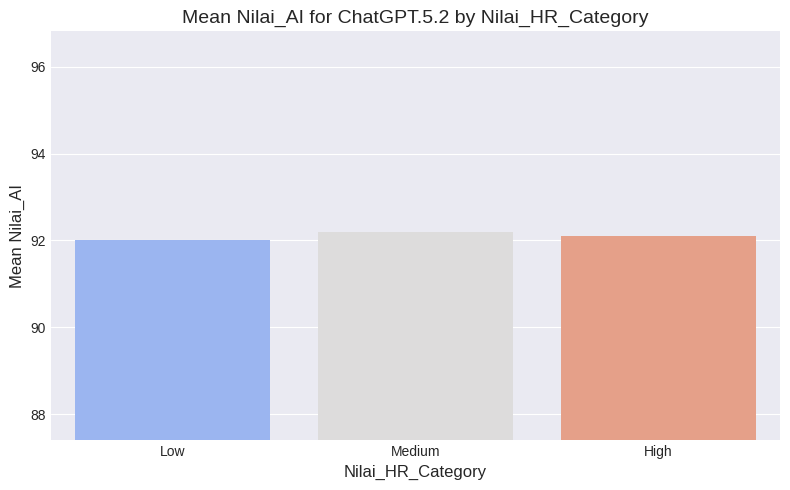

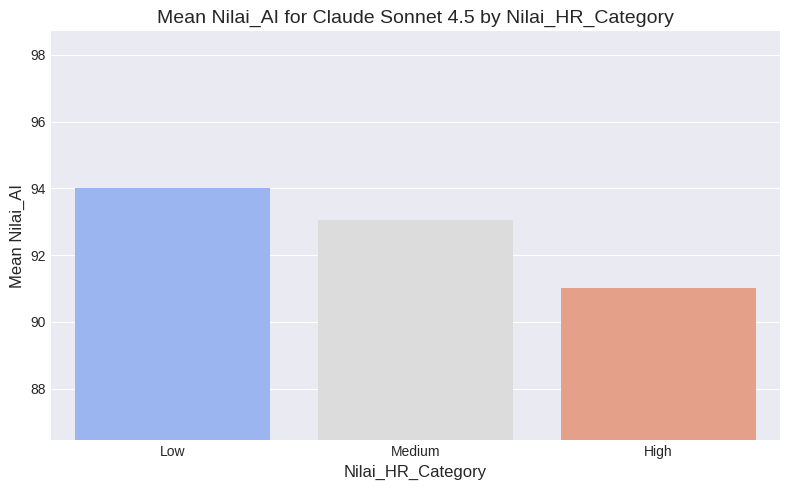

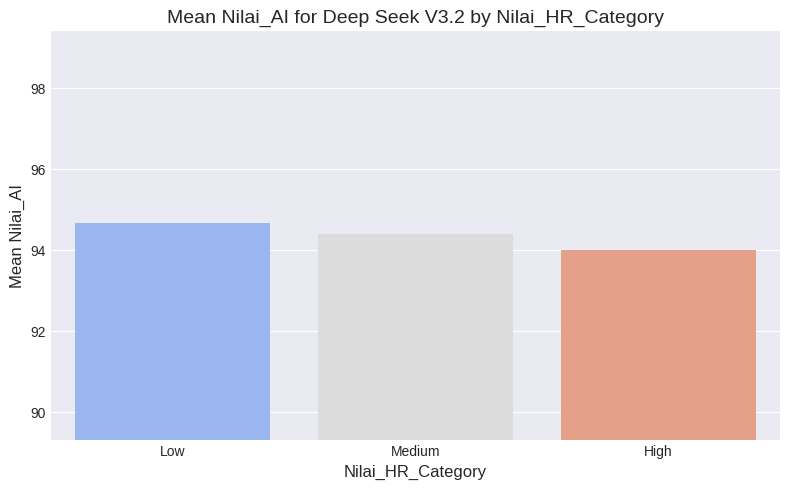

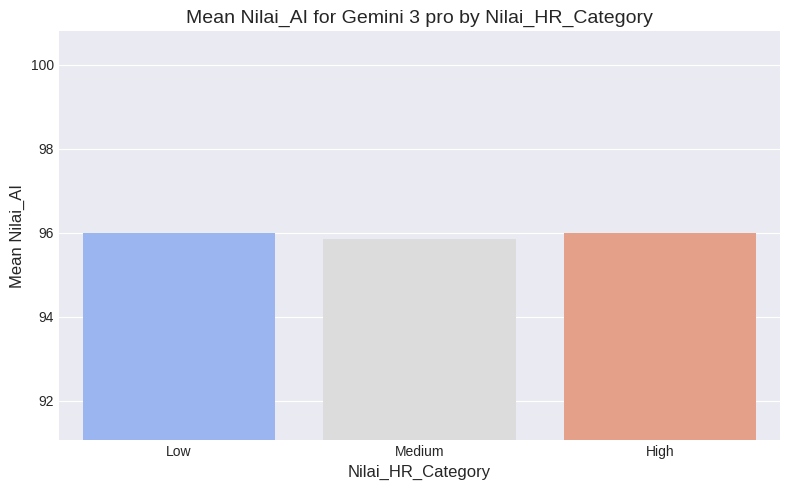

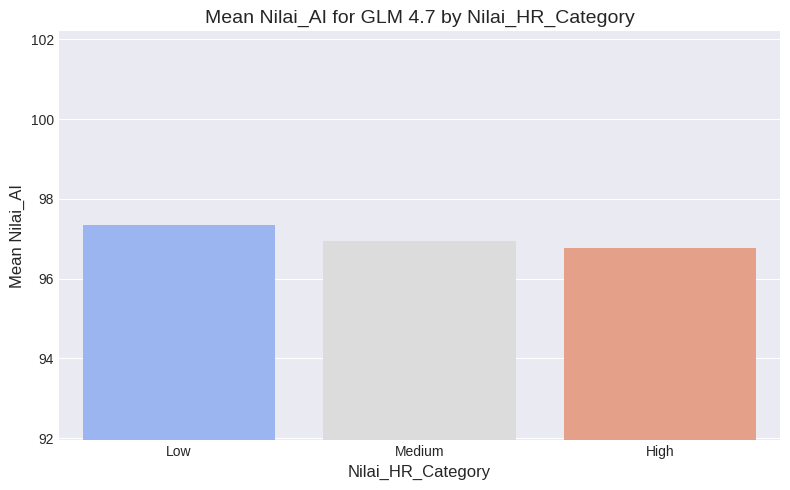

In [ ]:
for platform in unique_platforms:
    plt.figure(figsize=(8, 5))
    df_platform_category_mean = mean_nilai_ai_by_category.loc[platform]

    # Ensure consistent order of categories for plotting
    ordered_categories = ['Low', 'Medium', 'High']
    df_platform_category_mean = df_platform_category_mean.reindex(ordered_categories)

    sns.barplot(x=df_platform_category_mean.index, y=df_platform_category_mean.values, hue=df_platform_category_mean.index, palette='coolwarm', legend=False)
    plt.title(f'Mean Nilai_AI for {platform} by Nilai_HR_Category', fontsize=14)
    plt.xlabel('Nilai_HR_Category', fontsize=12)
    plt.ylabel('Mean Nilai_AI', fontsize=12)
    plt.ylim(min(df_platform_category_mean.values) * 0.95, max(df_platform_category_mean.values) * 1.05) # Dynamic y-limit
    plt.tight_layout()
    plt.show()

## Filter Data for Current Platform and Categories

### Subtask:
For each platform, filter `df_merged_scores` to include only data pertinent to that platform and the newly defined `Nilai_HR_Category`.


**Reasoning**:
I need to iterate through each unique AI platform and filter the `df_merged_scores` DataFrame to create `df_platform_filtered` containing only the data for the current platform. Then, I will print the platform name and the shape of the filtered DataFrame for verification.



In [ ]:
for platform in unique_platforms:
    df_platform_filtered = df_merged_scores[df_merged_scores['Platform'] == platform].copy()
    print(f"\nPlatform: {platform}")
    print(f"Shape of filtered data for {platform}: {df_platform_filtered.shape}")


Platform: ChatGPT.5.2
Shape of filtered data for ChatGPT.5.2: (32, 7)

Platform: Claude Sonnet 4.5
Shape of filtered data for Claude Sonnet 4.5: (32, 7)

Platform: Deep Seek V3.2
Shape of filtered data for Deep Seek V3.2: (32, 7)

Platform: Gemini 3 pro
Shape of filtered data for Gemini 3 pro: (32, 7)

Platform: GLM 4.7
Shape of filtered data for GLM 4.7: (32, 7)


## Perform Tukey's HSD Post-Hoc Test

### Subtask:
Conduct Tukey's Honestly Significant Difference (HSD) test for pairwise comparisons of 'Nilai_AI' means across the 'Nilai_HR_Category' groups for the current platform.


**Reasoning**:
I need to import the `pairwise_tukeyhsd` function to perform the Tukey's HSD post-hoc test as required by the instructions.



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("Imported pairwise_tukeyhsd successfully!")

Imported pairwise_tukeyhsd successfully!


**Reasoning**:
I will iterate through each unique AI platform, filter the data, and then apply Tukey's HSD test to compare the 'Nilai_AI' means across the 'Nilai_HR_Category' groups for each platform, printing the summary of the results.



In [ ]:
for platform in unique_platforms:
    print(f"\n{'='*50}")
    print(f"Tukey's HSD Post-Hoc Test for Platform: {platform}")
    print(f"{'='*50}")

    # Filter data for the current platform
    df_platform_filtered = df_merged_scores[df_merged_scores['Platform'] == platform].copy()

    # Ensure there's enough data and categories to perform the test
    if df_platform_filtered['Nilai_HR_Category'].nunique() < 2 or len(df_platform_filtered) < 2:
        print(f"Insufficient data or categories to perform Tukey's HSD for {platform}. Skipping.")
        continue

    # Perform Tukey's HSD test
    tukey_results = pairwise_tukeyhsd(
        endog=df_platform_filtered['Nilai_AI'],
        groups=df_platform_filtered['Nilai_HR_Category'],
        alpha=0.05
    )

    print(tukey_results)



Tukey's HSD Post-Hoc Test for Platform: ChatGPT.5.2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low  -0.1111 0.9964 -3.5168 3.2946  False
  High Medium   0.0889 0.9937 -1.9616 2.1394  False
   Low Medium      0.2 0.9867 -2.9629 3.3629  False
---------------------------------------------------

Tukey's HSD Post-Hoc Test for Platform: Claude Sonnet 4.5
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low      3.0 0.3533 -2.2862 8.2862  False
  High Medium     2.05 0.2657 -1.1327 5.2327  False
   Low Medium    -0.95 0.8822 -5.8593 3.9593  False
---------------------------------------------------

Tukey's HSD Post-Hoc Test for Platform: Deep Seek V3.2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject


## Report Post-Hoc Results

### Subtask:
Analyze and summarize the findings from the Tukey's HSD post-hoc tests for each AI platform.


## Summary:

### Data Analysis Key Findings

Kolom Nilai_HR berhasil dikategorikan ke dalam tiga kelompok, yaitu rendah (< 88), sedang (88–91), dan tinggi (≥ 92) berdasarkan distribusi data. Distribusi kategori tersebut dalam dataset gabungan menunjukkan bahwa kategori sedang memiliki jumlah observasi terbanyak sebanyak 100 data, diikuti oleh kategori tinggi sebanyak 45 data, dan kategori rendah sebanyak 15 data.

Analisis visual terhadap rata-rata Nilai_AI pada masing-masing kategori Nilai_HR untuk setiap platform kecerdasan artifisial menunjukkan adanya variasi pola. Sebagai contoh, platform GLM 4.7 memperlihatkan nilai Nilai_AI yang relatif tinggi dan konsisten pada seluruh kategori Nilai_HR, sedangkan platform Claude Sonnet 4.5 menunjukkan kecenderungan penurunan Nilai_AI seiring dengan peningkatan kategori Nilai_HR dari rendah ke tinggi.

Untuk menguji perbedaan tersebut secara statistik, dilakukan uji lanjut Tukey’s Honestly Significant Difference (HSD) pada setiap platform kecerdasan artifisial guna membandingkan rata-rata Nilai_AI antar kelompok kategori Nilai_HR rendah, sedang, dan tinggi. Hasil uji Tukey’s HSD pada seluruh platform yang dianalisis, yaitu ChatGPT 5.2, Claude Sonnet 4.5, Deep Seek V3.2, Gemini 3 Pro, dan GLM 4.7, secara konsisten menunjukkan nilai reject = False pada seluruh perbandingan pasangan kategori Nilai_HR. Temuan ini mengindikasikan bahwa tidak terdapat perbedaan yang signifikan secara statistik pada rata-rata Nilai_AI antar kategori Nilai_HR pada tingkat signifikansi α = 0,05.

### Insights or Next Steps

Meskipun secara visual terdapat perbedaan kecenderungan rata-rata Nilai_AI pada beberapa platform kecerdasan artifisial berdasarkan kategori Nilai_HR, hasil analisis statistik menggunakan uji Tukey’s HSD menunjukkan bahwa kategori Nilai_HR tidak memiliki pengaruh yang signifikan secara statistik terhadap Nilai_AI pada seluruh platform yang diuji. Hal ini mengimplikasikan bahwa kategori penilaian kepegawaian, sebagaimana didefinisikan dalam penelitian ini, belum menjadi faktor utama yang menjelaskan variasi kinerja rekomendasi kecerdasan artifisial.

Oleh karena itu, penelitian selanjutnya dapat diarahkan untuk mengeksplorasi faktor-faktor lain atau interaksi variabel yang berpotensi memengaruhi variasi Nilai_AI, serta mempertimbangkan pendekatan pengelompokan Nilai_HR yang berbeda, seperti penggunaan ambang batas alternatif atau perlakuan Nilai_HR sebagai variabel kontinu, guna memperoleh pemahaman yang lebih mendalam terhadap determinan akurasi rekomendasi kecerdasan artifisi


# Analisis Korelasi

Hitung korelasi Spearman atau Pearson antara Nilai_AI dan Nilai_HR untuk setiap platform

In [ ]:
correlation_results = {}

for platform in unique_platforms:
    print(f"\n{'='*50}")
    print(f"Correlation Analysis for Platform: {platform}")
    print(f"{'='*50}")

    df_platform = df_merged_scores[df_merged_scores['Platform'] == platform].copy()

    if len(df_platform) < 2:
        print(f"Insufficient data to calculate correlation for {platform}. Skipping.")
        correlation_results[platform] = {'Pearson_r': None, 'Pearson_p': None, 'Spearman_rho': None, 'Spearman_p': None}
        continue

    # Pearson Correlation
    pearson_r, pearson_p = pearsonr(df_platform['Nilai_AI'], df_platform['Nilai_HR'])
    print(f"Pearson Correlation (Nilai_AI vs Nilai_HR):\n  r = {pearson_r:.3f}, p-value = {pearson_p:.3f}")

    # Spearman Correlation
    spearman_rho, spearman_p = spearmanr(df_platform['Nilai_AI'], df_platform['Nilai_HR'])
    print(f"Spearman Correlation (Nilai_AI vs Nilai_HR):\n  rho = {spearman_rho:.3f}, p-value = {spearman_p:.3f}")

    correlation_results[platform] = {
        'Pearson_r': pearson_r,
        'Pearson_p': pearson_p,
        'Spearman_rho': spearman_rho,
        'Spearman_p': spearman_p
    }

print(f"\n{'='*50}")
print("Summary of Correlation Results:")
display(pd.DataFrame.from_dict(correlation_results, orient='index').round(3))



Correlation Analysis for Platform: ChatGPT.5.2
Pearson Correlation (Nilai_AI vs Nilai_HR):
  r = 0.072, p-value = 0.697
Spearman Correlation (Nilai_AI vs Nilai_HR):
  rho = 0.119, p-value = 0.515

Correlation Analysis for Platform: Claude Sonnet 4.5
Pearson Correlation (Nilai_AI vs Nilai_HR):
  r = -0.407, p-value = 0.021
Spearman Correlation (Nilai_AI vs Nilai_HR):
  rho = -0.411, p-value = 0.019

Correlation Analysis for Platform: Deep Seek V3.2
Pearson Correlation (Nilai_AI vs Nilai_HR):
  r = -0.189, p-value = 0.301
Spearman Correlation (Nilai_AI vs Nilai_HR):
  rho = -0.143, p-value = 0.434

Correlation Analysis for Platform: Gemini 3 pro
Pearson Correlation (Nilai_AI vs Nilai_HR):
  r = 0.002, p-value = 0.989
Spearman Correlation (Nilai_AI vs Nilai_HR):
  rho = 0.039, p-value = 0.833

Correlation Analysis for Platform: GLM 4.7
Pearson Correlation (Nilai_AI vs Nilai_HR):
  r = -0.093, p-value = 0.612
Spearman Correlation (Nilai_AI vs Nilai_HR):
  rho = -0.098, p-value = 0.593

Su

,Pearson_r,Pearson_p,Spearman_rho,Spearman_p
ChatGPT.5.2,0.07,0.70,0.12,0.52
Claude Sonnet 4.5,-0.41,0.02,-0.41,0.02
Deep Seek V3.2,-0.19,0.30,-0.14,0.43
Gemini 3 pro,0.00,0.99,0.04,0.83
GLM 4.7,-0.09,0.61,-0.10,0.59


# Analisis Agreement

In [ ]:
pip install pingouin

In [ ]:
pip install --upgrade pingouin

In [ ]:
import pingouin as pg

icc_results = {}

for platform in unique_platforms:
    print(f"\n{'='*50}")
    print(f"Agreement Analysis (ICC) for Platform: {platform}")
    print(f"{'='*50}")

    df_platform = df_merged_scores[df_merged_scores['Platform'] == platform].copy()

    if len(df_platform) < 2: # Need at least 2 observations for ICC
        print(f"Insufficient data for {platform}. Skipping ICC calculation.")
        icc_results[platform] = {'ICC': None, 'CI95%': None, 'p-value': None, 'Description': 'Insufficient data'}
        continue

    # Reshape data to long format required by pingouin.intraclass_corr
    df_icc_long = pd.DataFrame({
        'ID': df_platform['ID'].tolist() * 2,
        'Rater': ['AI'] * len(df_platform) + ['HR'] * len(df_platform),
        'Score': df_platform['Nilai_AI'].tolist() + df_platform['Nilai_HR'].tolist()
    })

    # Perform ICC calculation (using ICC(2,1) for two-way random effects, absolute agreement, single measure)
    icc_val = pg.intraclass_corr(data=df_icc_long, targets='ID', raters='Rater', ratings='Score')

    # Extract relevant values for ICC(2,1) absolute agreement
    icc_val_single = icc_val.loc[icc_val['Type'] == 'ICC2', 'ICC'].iloc[0]
    ci95_raw = icc_val.loc[icc_val['Type'] == 'ICC2', 'CI95%'].iloc[0]
    # Handle CI95% which may be a string or array
    if isinstance(ci95_raw, str):
        ci95 = [float(x) for x in ci95_raw.strip('[]').split(', ')]
    else:
        # Assume it's an array-like object
        ci95 = ci95_raw.tolist()
    p_value = icc_val.loc[icc_val['Type'] == 'ICC2', 'pval'].iloc[0]

    # Interpretation of ICC based on common guidelines
    if icc_val_single < 0.5:
        description = "Poor agreement"
    elif 0.5 <= icc_val_single < 0.75:
        description = "Moderate agreement"
    elif 0.75 <= icc_val_single < 0.9:
        description = "Good agreement"
    else:
        description = "Excellent agreement"

    print(f"  Intraclass Correlation Coefficient (ICC(2,1)): {icc_val_single:.3f}")
    print(f"  95% CI: [{ci95[0]:.3f}, {ci95[1]:.3f}]")
    print(f"  P-value: {p_value:.3f}")
    print(f"  Description: {description}")

    icc_results[platform] = {
        'ICC': icc_val_single,
        'CI95%': ci95,
        'p-value': p_value,
        'Description': description
    }

print(f"\n{'='*50}")
print("Summary of ICC Results:")
display(pd.DataFrame.from_dict(icc_results, orient='index').round(3))


Agreement Analysis (ICC) for Platform: ChatGPT.5.2
  Intraclass Correlation Coefficient (ICC(2,1)): 0.038
  95% CI: [-0.130, 0.260]
  P-value: 0.346
  Description: Poor agreement

Agreement Analysis (ICC) for Platform: Claude Sonnet 4.5
  Intraclass Correlation Coefficient (ICC(2,1)): -0.222
  95% CI: [-0.470, 0.130]
  P-value: 0.980
  Description: Poor agreement

Agreement Analysis (ICC) for Platform: Deep Seek V3.2
  Intraclass Correlation Coefficient (ICC(2,1)): -0.049
  95% CI: [-0.150, 0.120]
  P-value: 0.853
  Description: Poor agreement

Agreement Analysis (ICC) for Platform: Gemini 3 pro
  Intraclass Correlation Coefficient (ICC(2,1)): 0.000
  95% CI: [-0.040, 0.080]
  P-value: 0.495
  Description: Poor agreement

Agreement Analysis (ICC) for Platform: GLM 4.7
  Intraclass Correlation Coefficient (ICC(2,1)): -0.007
  95% CI: [-0.030, 0.040]
  P-value: 0.679
  Description: Poor agreement

Summary of ICC Results:


,ICC,CI95%,p-value,Description
ChatGPT.5.2,0.04,"[-0.13, 0.26]",0.35,Poor agreement
Claude Sonnet 4.5,-0.22,"[-0.47, 0.13]",0.98,Poor agreement
Deep Seek V3.2,-0.05,"[-0.15, 0.12]",0.85,Poor agreement
Gemini 3 pro,0.00,"[-0.04, 0.08]",0.49,Poor agreement
GLM 4.7,-0.01,"[-0.03, 0.04]",0.68,Poor agreement


# Analisis Varians Antar Platform

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure 'Platform' and 'Nilai_HR_Category' are categorical for statsmodels
df_merged_scores['Platform'] = df_merged_scores['Platform'].astype('category')
df_merged_scores['Nilai_HR_Category'] = df_merged_scores['Nilai_HR_Category'].astype('category')

# Perform two-way ANOVA
# The formula 'Nilai_AI ~ C(Platform) + C(Nilai_HR_Category) + C(Platform):C(Nilai_HR_Category)'
# specifies 'Nilai_AI' as the dependent variable, and 'Platform', 'Nilai_HR_Category', and their interaction as independent variables.
# C() is used to treat the variables as categorical.
model = ols('Nilai_AI ~ C(Platform) + C(Nilai_HR_Category) + C(Platform):C(Nilai_HR_Category)', data=df_merged_scores).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 for Type II sum of squares

print("Two-Way ANOVA Results:")
display(anova_table)

Two-Way ANOVA Results:


,sum_sq,df,F,PR(>F)
C(Platform),547.94,4.00,26.98,0.00
C(Nilai_HR_Category),11.13,2.00,1.10,0.34
C(Platform):C(Nilai_HR_Category),24.20,8.00,0.60,0.78
Residual,736.23,145.00,NaN,NaN
